In [1]:
import pandas as pd
import numpy as np

In [3]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 33.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=8148dd54f37bd2de226f3e12464e30be748c115da515939d481b1c0d85bfadd1
  Stored in directory: /Users/yaminipriyankakandikattu/Library/Caches/pip/wheels/03/8b/6f/9f13c705de81a6b351b718b3cf917e41ad7c0933c8630d4dd4
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 17.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pylab import rcParams

In [4]:
missing_values = ["N/a","na",np.nan]

In [45]:
df_final2 = pd.read_csv("Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes__2020-2023.csv",na_values = missing_values,thousands=',')

In [46]:
df_final2.head()

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,02/01/2023,United States,2020,1,2020-01-04,60193,55019,843.0,11569.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/2023,United States,2020,2,2020-01-11,60735,55754,861.0,11962.0,1942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02/01/2023,United States,2020,3,2020-01-18,59362,54516,829.0,11701.0,1819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02/01/2023,United States,2020,4,2020-01-25,59162,54401,828.0,11879.0,1864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02/01/2023,United States,2020,5,2020-02-01,58844,54007,811.0,11964.0,1828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_final2.isnull().sum()

Data As Of                                                                                              0
Jurisdiction of Occurrence                                                                              0
MMWR Year                                                                                               0
MMWR Week                                                                                               0
Week Ending Date                                                                                        0
All Cause                                                                                               0
Natural Cause                                                                                           0
Septicemia (A40-A41)                                                                                 3651
Malignant neoplasms (C00-C97)                                                                           7
Diabetes mellitus (E10-E14)                   

In [48]:
df_final2.shape

(8640, 35)

In [49]:
df_final2=df_final2.drop(['flag_allcause','flag_natcause',
                'flag_sept',
              'flag_neopl',
              'flag_diab',
               'flag_alz',
               'flag_inflpn',
               'flag_clrd',
               'flag_otherresp',
              'flag_nephr',
              'flag_otherunk',
               'flag_hd',
               'flag_stroke',
               'flag_cov19mcod',
               'flag_cov19ucod'], 
               axis=1)

In [50]:
df_final2 = pd.melt(df_final2, id_vars = ['Data As Of','Jurisdiction of Occurrence','MMWR Year','MMWR Week','Week Ending Date',],
        var_name = 'Cause of death', value_name = 'No Of deaths')

In [51]:
df_final2=df_final2.dropna()

In [52]:
df_final2.dtypes

Data As Of                     object
Jurisdiction of Occurrence     object
MMWR Year                       int64
MMWR Week                       int64
Week Ending Date               object
Cause of death                 object
No Of deaths                  float64
dtype: object

In [53]:
indexcauses = df_final2[ (df_final2['Cause of death'] == 'All Cause') ].index
df_final2.drop(indexcauses , inplace=True)

In [54]:
df_final2.isnull().sum()

Data As Of                    0
Jurisdiction of Occurrence    0
MMWR Year                     0
MMWR Week                     0
Week Ending Date              0
Cause of death                0
No Of deaths                  0
dtype: int64

In [55]:
df_final2.shape

(95366, 7)

In [56]:
df_final2_3 = df_final2.loc[df_final2["Jurisdiction of Occurrence"] == 'United States']

In [57]:
df_final2_3=df_final2_3.drop(['Data As Of','Jurisdiction of Occurrence','Week Ending Date','Cause of death'], axis=1)

In [58]:
df_final2_3.head()

,MMWR Year,MMWR Week,No Of deaths
8640,2020,1,55019.0
8641,2020,2,55754.0
8642,2020,3,54516.0
8643,2020,4,54401.0
8644,2020,5,54007.0


In [59]:
def random_centroids(df_final2_3, k):
    centroids = []
    for i in range(k):
        centroid = df_final2_3.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
centroids = random_centroids(df_final2_3, 2)
centroids

,0,1
MMWR Year,2020.0,2022.0
MMWR Week,42.0,34.0
No Of deaths,801.0,2599.0


In [60]:
def get_labels(df_final2_3, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df_final2_3 - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [61]:
labels = get_labels(df_final2_3, centroids)
labels.value_counts()

1    1390
0     850
dtype: int64

In [62]:
def new_centroids(df_final2_3, labels, k):
    centroids = df_final2_3.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [63]:
def plot_clusters(df_final2_3, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df_final2_3)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1],color='red',marker='*',label='centroid')
    plt.show()

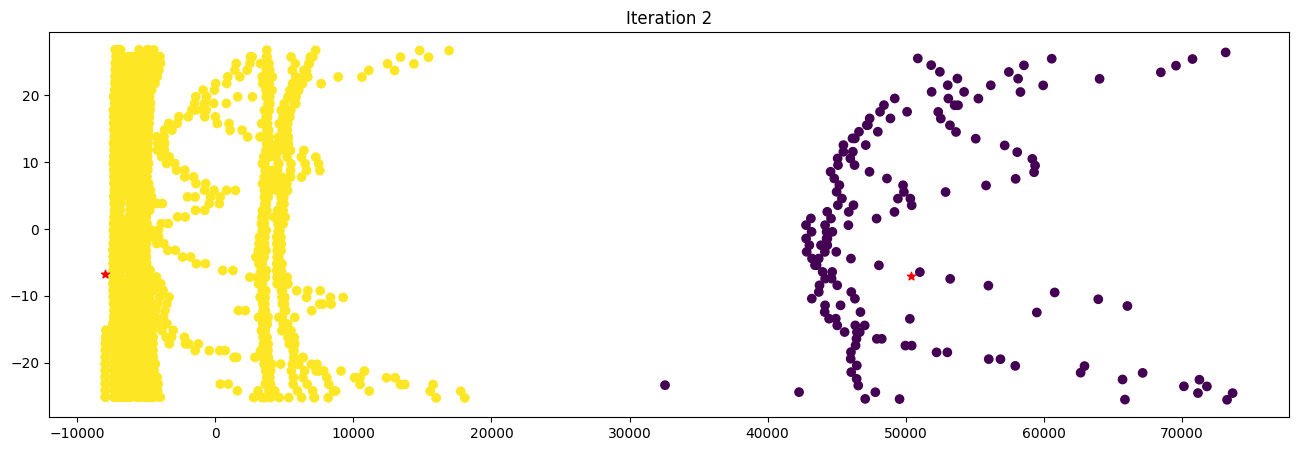

In [65]:
max_iterations = 200
centroid_count = 2

centroids = random_centroids(df_final2_3, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_final2_3, centroids)
    centroids = new_centroids(df_final2_3, labels, centroid_count)
    plot_clusters(df_final2_3, labels, centroids, iteration)
    iteration += 1

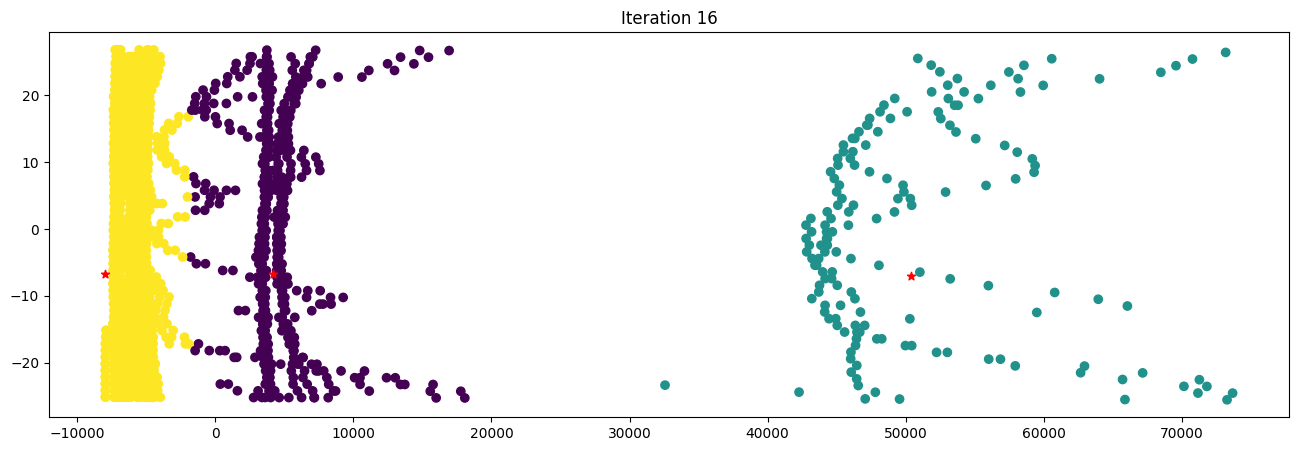

In [66]:
max_iterations = 200
centroid_count = 3

centroids = random_centroids(df_final2_3, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_final2_3, centroids)
    centroids = new_centroids(df_final2_3, labels, centroid_count)
    plot_clusters(df_final2_3, labels, centroids, iteration)
    iteration += 1

In [33]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_final2_3) for k in range(1, 10)]

predicted_labels = [model.predict(df_final2_3) for model in kmeans_per_k]
silhouette_scores = [silhouette_score(df_final2_3, labels) for labels in predicted_labels[1:]]

/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` 

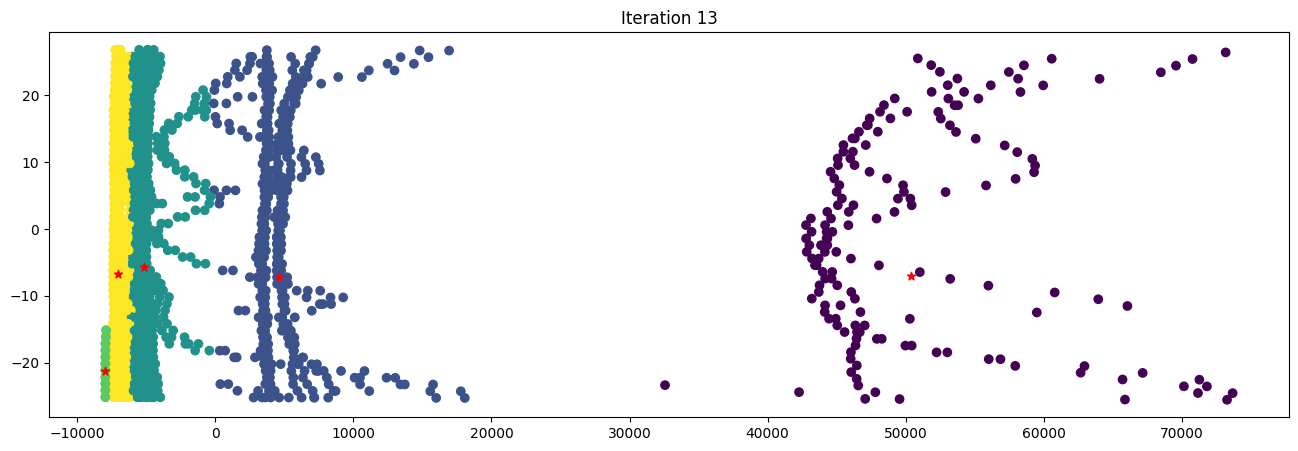

In [67]:
max_iterations = 200
centroid_count = 5

centroids = random_centroids(df_final2_3, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_final2_3, centroids)
    centroids = new_centroids(df_final2_3, labels, centroid_count)
    plot_clusters(df_final2_3, labels, centroids, iteration)
    iteration += 1

In [34]:
rcParams['figure.figsize'] = 16, 5

/var/folders/_s/gkpblw2d16z4xw8h19yy2bhm0000gn/T/ipykernel_20081/1585516380.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range (2, 10), silhouette_scores,"bo-", color="blue", linewidth=3, markersize=8, label="Silhoutee curve")


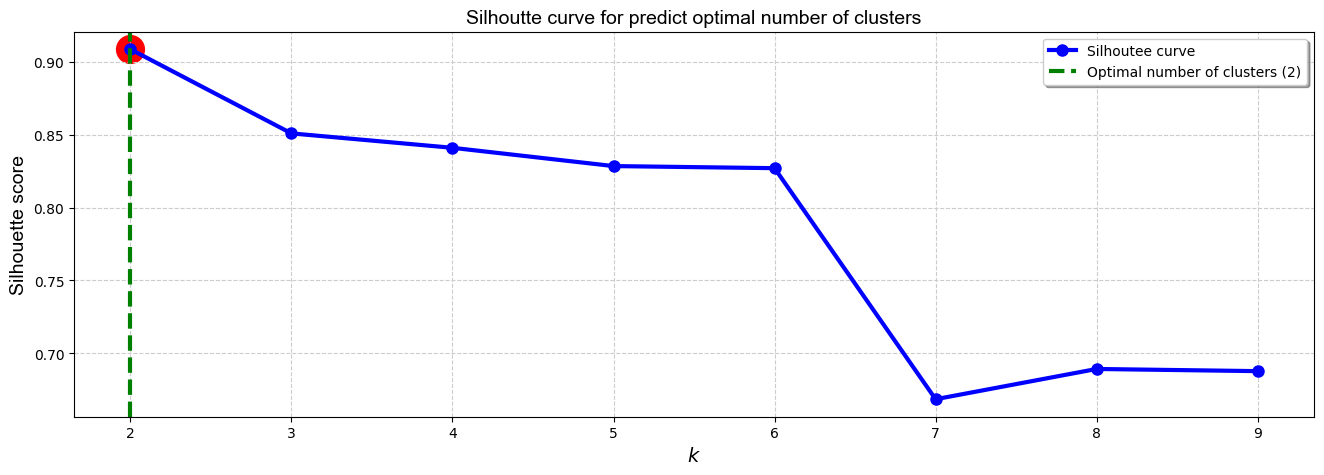

In [35]:
plt.plot(range (2, 10), silhouette_scores,"bo-", color="blue", linewidth=3, markersize=8, label="Silhoutee curve")
plt.xlabel("$k$", fontsize=14, family= 'Arial')
plt.ylabel("Silhouette score", fontsize=14, family="Arial")
plt.grid(which='major', color='#cccccc', linestyle="--")
plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)
k =np.argmax(silhouette_scores) + 2

plt.axvline(x=k, linestyle='--',c="green", linewidth=3,label='Optimal number of clusters ({})'.format(k))
plt.scatter (k, silhouette_scores[k-2], c='red', s=400) 
plt.legend(shadow=True)
plt.show()

/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` 

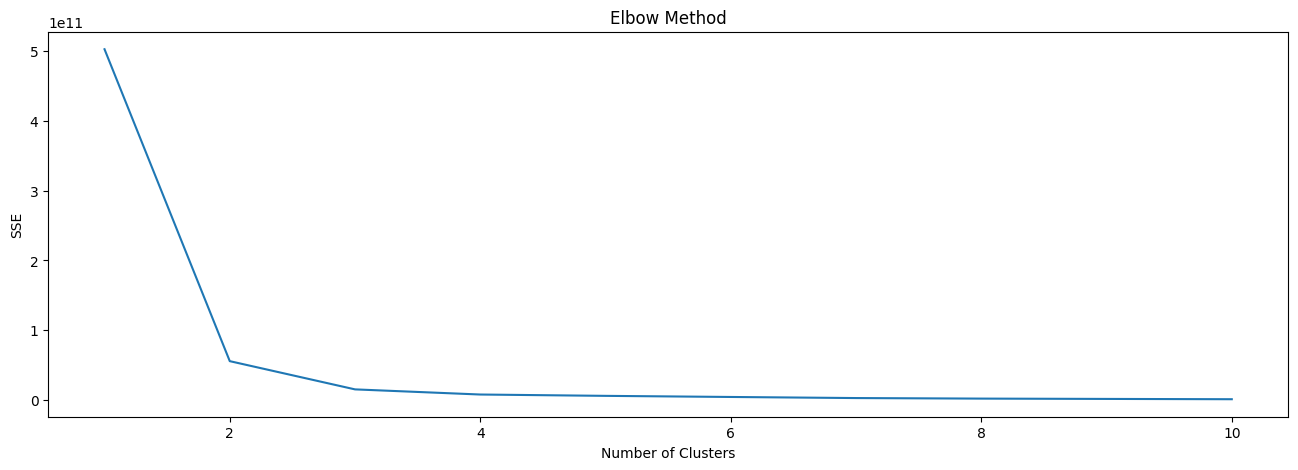

In [36]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_final2_3)
    sse.append(kmeans.inertia_)

# Plot the SSE as a function of k
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()